# Compare Binary Classification Models

*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False", "Internal" or "External", "Profitable" or "Non-Profitable", and so on. 

In this notebook, we'll experiment with multiple binary classification models.

In [66]:
import urllib.request
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv"

# Download the file
urllib.request.urlretrieve(url, "diabetes.csv")

# Assuming the file is downloaded correctly
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [67]:
# Group column names
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
labels = ['Diabetic']

# Create input and output features
X, y = diabetes[features].values, diabetes[labels].values

# Print a few values
for i in range(0,4):
    print(f"Record {i}:\n Features: {X[i]}\n Label: {y[i]}\n")

Record 0:
 Features: [  0.         171.          80.          34.          23.
  43.50972593   1.21319135  21.        ]
 Label: [0]

Record 1:
 Features: [ 8.         92.         93.         47.         36.         21.24057571
  0.15836498 23.        ]
 Label: [0]

Record 2:
 Features: [7.00000000e+00 1.15000000e+02 4.70000000e+01 5.20000000e+01
 3.50000000e+01 4.15115235e+01 7.90185680e-02 2.30000000e+01]
 Label: [0]

Record 3:
 Features: [  9.         103.          78.          25.         304.
  29.58219193   1.28286985  43.        ]
 Label: [1]



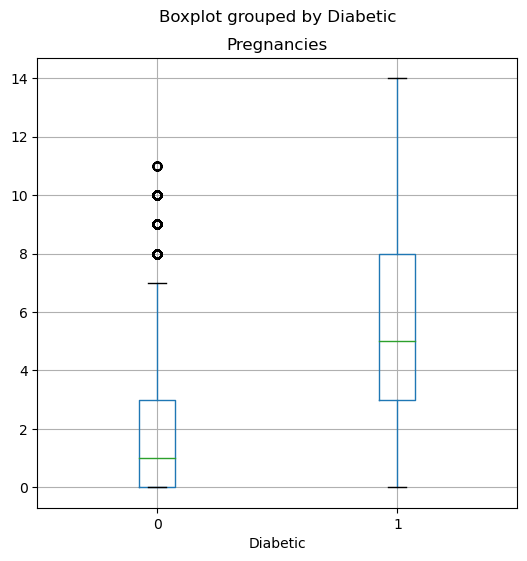

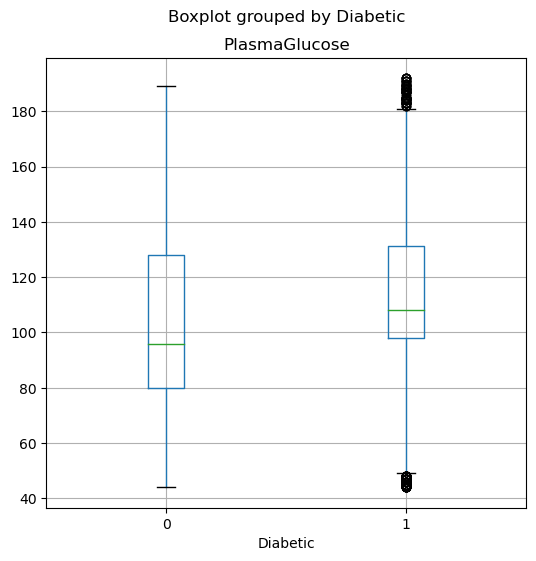

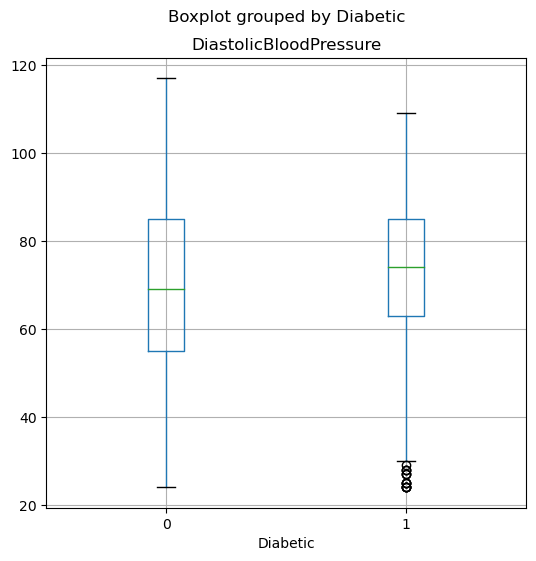

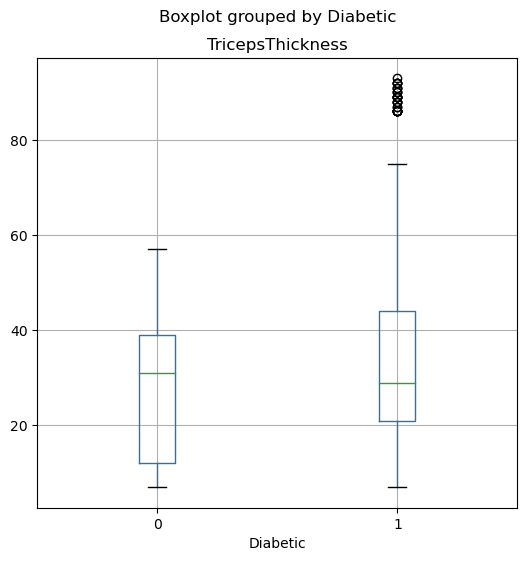

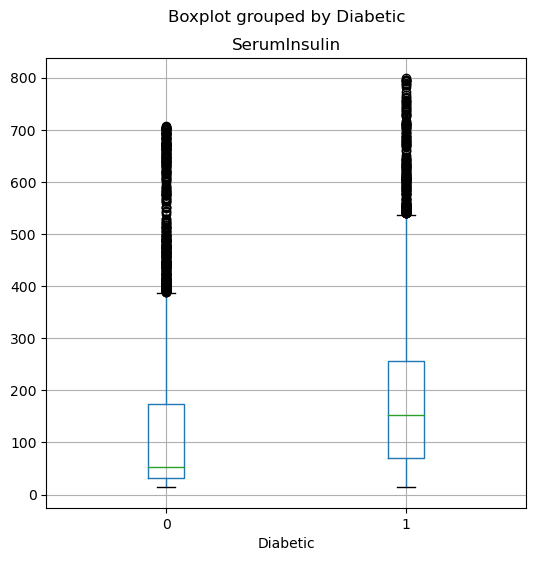

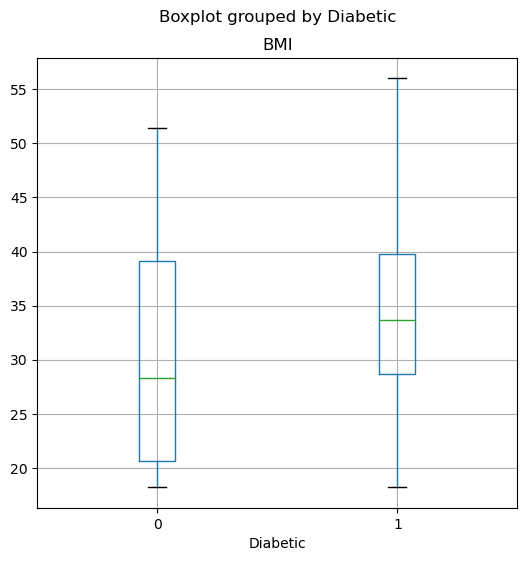

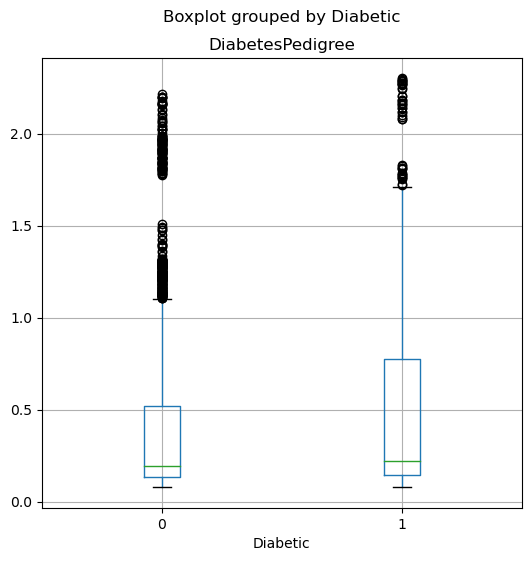

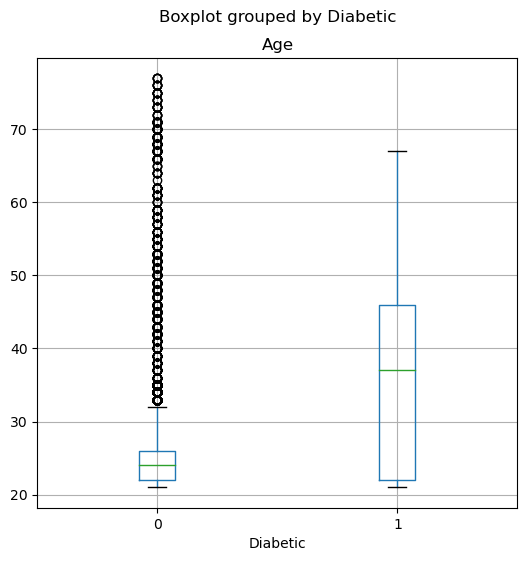

In [68]:
# Plot features
from matplotlib import pyplot as plt
%matplotlib inline

for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

In [69]:
# Create train and test set
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Flatten the output data
y_train = y_train.flatten()
y_test = y_test.flatten()

# Print stats
print(f"Number of training records: {len(X_train)}\nNumber of test records: {len(X_test)}")

Number of training records: 10500
Number of test records: 4500


## Helper functions

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report

def create_pipeline(model):
    # Define preprocessing for numeric columns (normalize them so they're on the same scale)
    numeric_features = [0,1,2,3,4,5,6]
    numeric_transformer = Pipeline(steps=[
                                        ('scaler', StandardScaler())])
    
    # Define preprocessing for categorical features (encode the Age column)
    categorical_features = [7]
    categorical_transformer = Pipeline(steps=[
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Create preprocessing and training pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', model)])
    
    return pipe

# Train the model
def train_model(pipeline):
    # Train the model pipeline
    model = pipeline.fit(X_train, y_train)

    return model

# Evaluate model
def evaluate_model(model):
    # Make prediction
    predictions = model.predict(X_test)
    y_scores = model.predict_proba(X_test)

    # Print model name
    print(f"Model: {model['regressor']}\n")

    # Get evaluation metrics
    cm = confusion_matrix(y_test, predictions)
    print ('Confusion Matrix:\n',cm, '\n')
    print(f"Accuracy: {accuracy_score(y_test, predictions)*100:.2f}%")

    # Run a classification Report
    print(f"\n\nClassification Report: \n{classification_report(y_test, predictions)}\n")

    print(f"Overall Precision: {precision_score(y_test, predictions)*100:.2f}%")
    print(f"Overall Recall: {recall_score(y_test, predictions)*100:.2f}%")
    auc = roc_auc_score(y_test,y_scores[:,1])
    print(f"AUC: {auc:.4f}")

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


    

## Model 1: Logistic Regression

In this example, we'll use *Logistic Regression*, which is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

Model: LogisticRegression(C=100.0, solver='liblinear')

Confusion Matrix:
 [[2720  285]
 [ 436 1059]] 

Accuracy: 83.98%


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3005
           1       0.79      0.71      0.75      1495

    accuracy                           0.84      4500
   macro avg       0.82      0.81      0.81      4500
weighted avg       0.84      0.84      0.84      4500


Overall Precision: 78.79%
Overall Recall: 70.84%
AUC: 0.9197


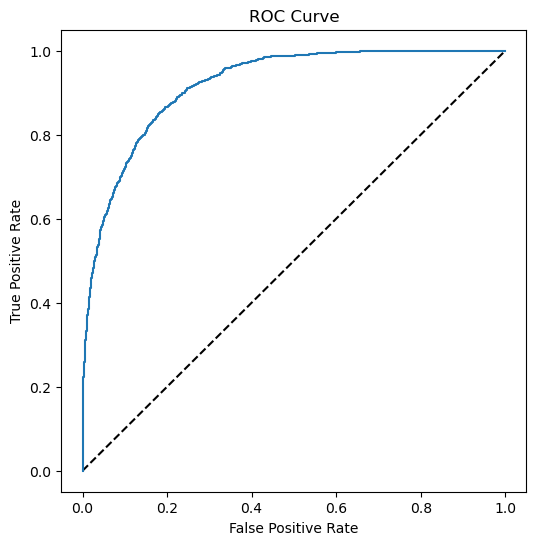

In [71]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# Define model
model_def = LogisticRegression(C=1/reg, solver="liblinear")

# Create pipeline
pipe = create_pipeline(model_def)

# Train model
model_lr = train_model(pipeline=pipe)

# Evaluate model
evaluate_model(model_lr)

Defintions:

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: How many instances of this class are there in the test dataset?

In the case of diabetic dataset, precision and recall would be:
- Precision: Of all the patients the model predicted are diabetic, how many are actually diabetic?
- Recall: Of all the patients that are actually diabetic, how many did the model identify?

Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, in statistical machine learning algorithms, like logistic regression, results are based on *probability*. What actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

## Model 2 : Random Forest Classifier

Model: RandomForestClassifier()

Confusion Matrix:
 [[2893  112]
 [ 175 1320]] 

Accuracy: 93.62%


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3005
           1       0.92      0.88      0.90      1495

    accuracy                           0.94      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.94      0.94      0.94      4500


Overall Precision: 92.18%
Overall Recall: 88.29%
AUC: 0.9836


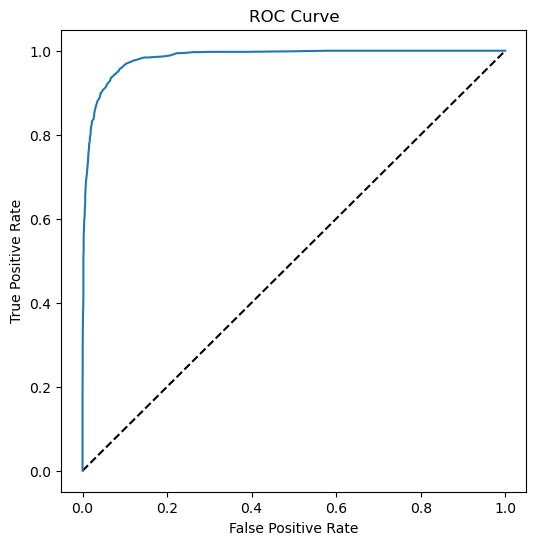

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model_def = RandomForestClassifier(n_estimators=100)

# Create pipeline
pipe = create_pipeline(model_def)

# Train model
model_rf = train_model(pipeline=pipe)

# Evaluate model
evaluate_model(model_rf)


In [73]:
# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model_rf.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1
